In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.metrics import accuracy_score

# Load dataset
file_path = "AB_NYC_2019.csv"
data = pd.read_csv(file_path)


# Display the dataset in a nice tabular format (without print)
data.head(20)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [ ]:
# Drop uninformative columns
data = data.drop(columns=['id', 'host_id', 'name', 'host_name', 'longitude','latitude','last_review','neighbourhood_group','calculated_host_listings_count','minimum_nights'])

# Drop rows with missing values (or impute if needed)
data = data.dropna()

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['price'])
y = data['price']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




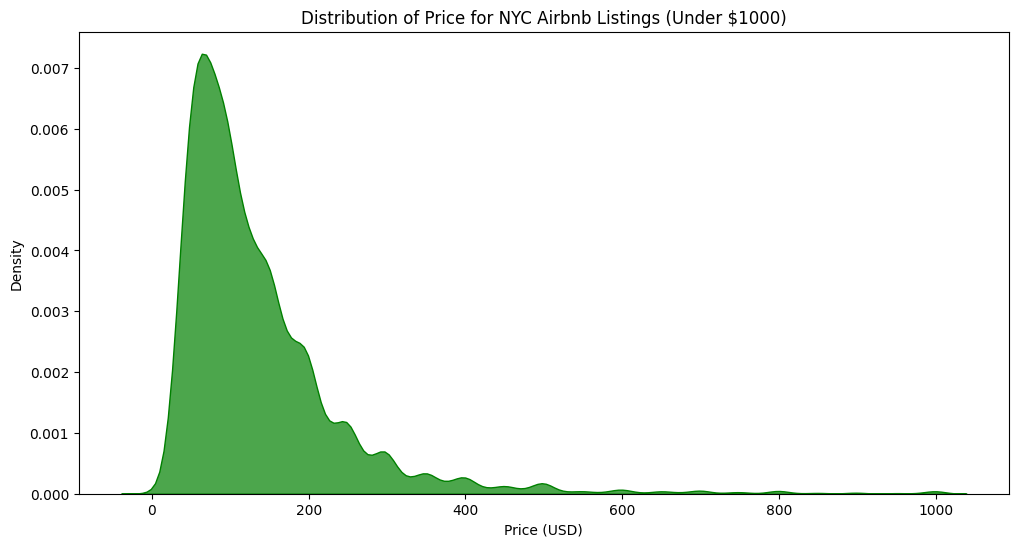

In [ ]:
# Distribution of Prices

import seaborn as sns
import matplotlib.pyplot as plt

# Limit to reasonable prices (e.g., under $1000)
filtered_price_data = data[data['price'] <= 1000]

plt.figure(figsize=(12, 6))
sns.kdeplot(data=filtered_price_data, x="price", fill=True, color="green", alpha=0.7)

plt.title("Distribution of Price for NYC Airbnb Listings (Under $1000)")
plt.xlabel("Price (USD)")
plt.ylabel("Density")
plt.show()

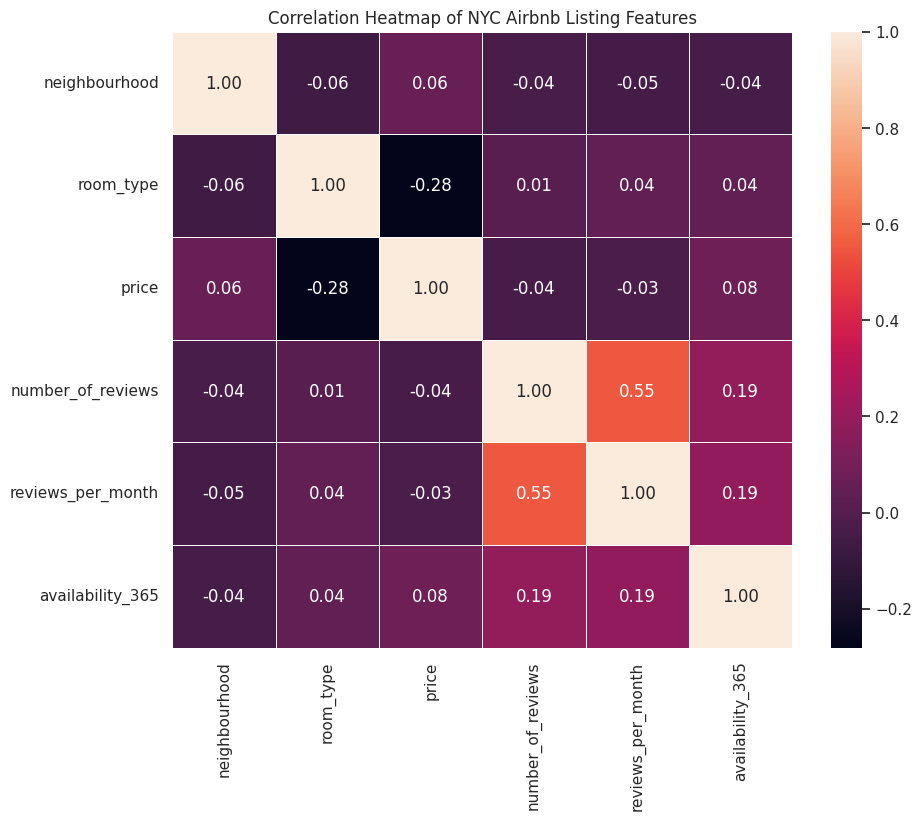

In [ ]:
# Visualizing Feature Relationships with a Correlation Heatmap (Airbnb Dataset)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Create a correlation matrix from the Airbnb dataset
corr_matrix = data.corr()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title("Correlation Heatmap of NYC Airbnb Listing Features")
plt.show()


In [ ]:
# Decision Tree
dtree_model = tree.DecisionTreeClassifier()
dtree_model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, dtree_model.predict(X_test)) * 100
print('accuracy ', accuracy )

accuracy  4.080319217402497


In [ ]:
# Finding the Best Number of Neighbors for KNN

best_k = None
best_accuracy = 0.0

for k in range(1, 8):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv_model, X_train, y_train, cv=5)
    average_cv_accuracy = cv_scores.mean()
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_k = k

print(f"\nBest k = {best_k} yields the highest average CV accuracy.")

# Train final KNN model and evaluate
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
print("Test set accuracy:", knn_model.score(X_test, y_test) * 100)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  1  cv accuracy:  0.0306


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  2  cv accuracy:  0.0307


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  3  cv accuracy:  0.0291


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  4  cv accuracy:  0.0287


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  5  cv accuracy:  0.0281


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  6  cv accuracy:  0.0283


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


k:  7  cv accuracy:  0.0284

Best k = 2 yields the highest average CV accuracy.
Test set accuracy: 2.934740635860471


In [ ]:
# KNeighbors model
knn_model = KNeighborsClassifier(n_neighbors=best_k)   # here, we use the best_k!
knn_model.fit(X_train, y_train)
print("Accuracy on test set:", knn_model.score(X_test, y_test)* 100 )


Accuracy on test set: 2.934740635860471


In [ ]:
# Finding the Best Random Forest Depth and Number of Trees

best_d = 1
best_ntrees = 50
best_accuracy = 0

for d in range(9, 10):
    for ntrees in range(50, 300, 100):
        rforest_model = ensemble.RandomForestClassifier(
            max_depth=d,
            n_estimators=ntrees,
            max_samples=0.5
        )
        cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
        average_cv_accuracy = cv_scores.mean()
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

        if average_cv_accuracy > best_accuracy:
            best_d = d
            best_ntrees = ntrees

best_depth = best_d
best_num_trees = best_ntrees

print(f"\nBest depth: {best_depth}, Best number of trees: {best_num_trees}")


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


depth:  9 ntrees:  50 cv accuracy:  0.0705


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


depth:  9 ntrees: 150 cv accuracy:  0.0717


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


depth:  9 ntrees: 250 cv accuracy:  0.0727

Best depth: 9, Best number of trees: 250


In [ ]:
# Random Forest:
rforest_model= ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)
rforest_model.fit(X_train, y_train)
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")
print("Accuracy on test set:", rforest_model.score(X_test, y_test) * 100)

Built an RF classifier with depth=9 and ntrees=250
Accuracy on test set: 7.362594928562234


In [ ]:
print("Accuracy on test set:", rforest_model.score(X_test, y_test)*100)

Accuracy on test set: 7.362594928562234


In [ ]:
# Neural network
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = y_train
y_test_scaled = y_test

nn_classifier = MLPClassifier(
    hidden_layer_sizes=(5, 10),
    max_iter=500,
    activation="tanh",
    solver='sgd',
    verbose=True,
    shuffle=True,
    random_state=None,
    learning_rate_init=0.1,
    learning_rate='adaptive'
)

print("Training started...")
nn_classifier.fit(X_train_scaled, y_train_scaled)
print("Training completed.")
print("Final training loss:", nn_classifier.loss_)
print("Test accuracy:", nn_classifier.score(X_test_scaled, y_test_scaled) * 100)

Training started...
Iteration 1, loss = 5.03756482
Iteration 2, loss = 4.59049968
Iteration 3, loss = 4.53487301
Iteration 4, loss = 4.51246203
Iteration 5, loss = 4.50128150
Iteration 6, loss = 4.49337762
Iteration 7, loss = 4.48842422
Iteration 8, loss = 4.48375101
Iteration 9, loss = 4.47995544
Iteration 10, loss = 4.47791271
Iteration 11, loss = 4.47566050
Iteration 12, loss = 4.47319630
Iteration 13, loss = 4.47052770
Iteration 14, loss = 4.46934643
Iteration 15, loss = 4.46591213
Iteration 16, loss = 4.46462827
Iteration 17, loss = 4.46470387
Iteration 18, loss = 4.46235793
Iteration 19, loss = 4.46136859
Iteration 20, loss = 4.45850315
Iteration 21, loss = 4.45790831
Iteration 22, loss = 4.45748630
Iteration 23, loss = 4.45513398
Iteration 24, loss = 4.45479941
Iteration 25, loss = 4.45283443
Iteration 26, loss = 4.45207229
Iteration 27, loss = 4.45213322
Iteration 28, loss = 4.44997264
Iteration 29, loss = 4.44955879
Iteration 30, loss = 4.44927117
Iteration 31, loss = 4.447381

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


# **Students Performance**

In [ ]:
# Load dataset
file_path = "Student_performance_data.csv"
data = pd.read_csv(file_path)


# Display the dataset in a nice tabular format (without print)
data.head(20)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
5,1006,18,0,0,1,8.191219,0,0,1,1,0,0,0,3.084184,1.0
6,1007,15,0,1,1,15.601680,10,0,3,0,1,0,0,2.748237,2.0
7,1008,15,1,1,4,15.424496,22,1,1,1,0,0,0,1.360143,4.0
8,1009,17,0,0,0,4.562008,1,0,2,0,1,0,1,2.896819,2.0
9,1010,16,1,0,1,18.444466,0,0,3,1,0,0,0,3.573474,0.0


In [ ]:
# Drop uninformative columns
data = data.drop(columns=['StudentID'])



# Drop rows with missing values (or impute if needed)
data = data.dropna()

# Encode categorical features
label_encoders = {}
for col in data.select_dtypes(include='object').columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and target (y)
X = data.drop(columns=['GradeClass'])
y = data['GradeClass']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




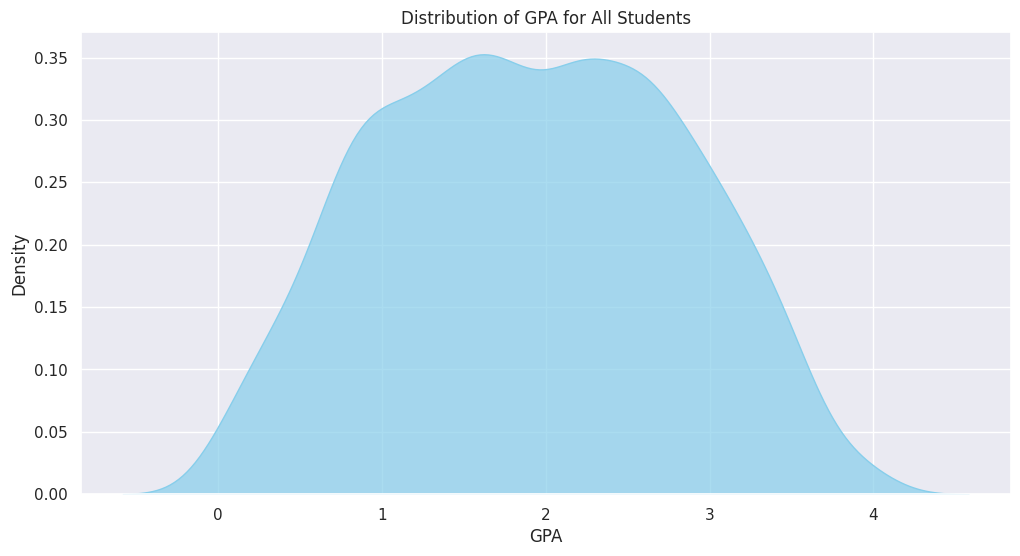

In [ ]:
# Distribution of GPA for All Students

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = 12, 6

# Plot GPA density for all students
sns.kdeplot(data=data, x="GPA", fill=True, color="skyblue", alpha=0.7)

# Format plot
plt.title("Distribution of GPA for All Students")
plt.xlabel("GPA")
plt.ylabel("Density")
plt.show()

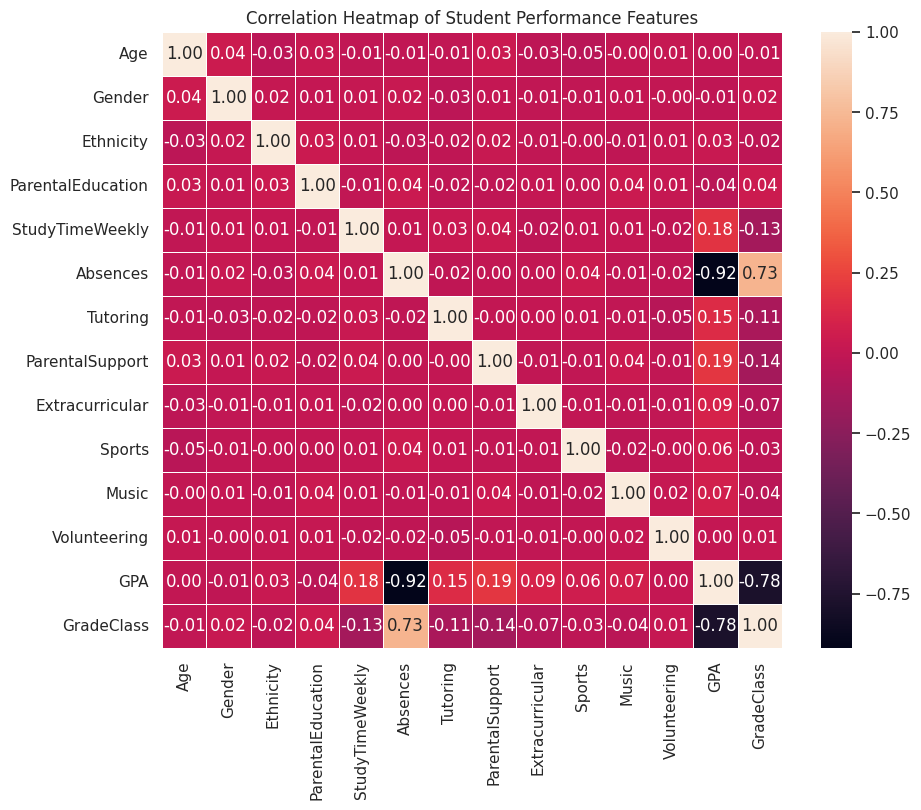

In [ ]:
# Visualizing Feature Relationships with a Correlation Heatmap


# Making sure a provided example works, adapted to student data...

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# Create a correlation matrix from the student dataset
corr_matrix = data.corr()

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5, ax=ax)
plt.title("Correlation Heatmap of Student Performance Features")
plt.show()

In [ ]:
# This heatmap visualizes the correlation between numerical features in the student performance dataset.
# Stronger correlations are indicated by higher absolute values and more intense colors.
# GPA shows a positive correlation with study time and parental support, and a negative correlation with absences.
# This visualization helps identify which factors are most associated with student academic performance.


In [ ]:
# Descion Tree model:

# Train a Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
accuracy = 100 - (mae / y_test.mean()) * 100
print("Approximate accuracy (%):", accuracy)

Approximate accuracy (%): 88.56140350877193


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

best_k = None
best_score = -np.inf  # For maximizing R^2

for k in range(1, 8):
    knn_cv_model = KNeighborsRegressor(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv_model, X_train, y_train, cv=5, scoring='r2')
    average_cv_score = cv_scores.mean()
    print(f"k: {k:2d}  cv R² score: {average_cv_score:7.4f}")
    if average_cv_score > best_score:
        best_score = average_cv_score
        best_k = k

print(f"\nBest k = {best_k} yields the highest average CV R² score.")

# Train final KNN regressor and evaluate
knn_model = KNeighborsRegressor(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print("Test set R² score:", r2_score(y_test, y_pred))
print("Test set RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


k:  1  cv R² score:  0.2955
k:  2  cv R² score:  0.4721
k:  3  cv R² score:  0.5387
k:  4  cv R² score:  0.5622
k:  5  cv R² score:  0.5761
k:  6  cv R² score:  0.5871
k:  7  cv R² score:  0.5962

Best k = 7 yields the highest average CV R² score.
Test set R² score: 0.6499214200586017
Test set RMSE: 0.7232364923153592


In [ ]:
# Finding the Best Number of Neighbors for KNN

best_k = None
best_accuracy = 0.0

for k in range(1, 8):
    knn_cv_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_cv_model, X_train, y_train, cv=5)
    average_cv_accuracy = cv_scores.mean()
    print(f"k: {k:2d}  cv accuracy: {average_cv_accuracy:7.4f}")
    if average_cv_accuracy > best_accuracy:
        best_accuracy = average_cv_accuracy
        best_k = k

print(f"\nBest k = {best_k} yields the highest average CV accuracy.")

# Train final KNN model and evaluate
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train, y_train)
print("Test set accuracy:", knn_model.score(X_test, y_test) * 100)


k:  1  cv accuracy:  0.6330
k:  2  cv accuracy:  0.5881
k:  3  cv accuracy:  0.6665
k:  4  cv accuracy:  0.6796
k:  5  cv accuracy:  0.6958
k:  6  cv accuracy:  0.6947
k:  7  cv accuracy:  0.7020

Best k = 7 yields the highest average CV accuracy.
Test set accuracy: 67.64091858037578


In [ ]:
# Finding the Best Random Forest Depth and Number of Trees

best_d = 1
best_ntrees = 50
best_accuracy = 0

for d in range(9, 10):
    for ntrees in range(50, 300, 100):
        rforest_model = ensemble.RandomForestClassifier(
            max_depth=d,
            n_estimators=ntrees,
            max_samples=0.5
        )
        cv_scores = cross_val_score(rforest_model, X_train, y_train, cv=5)
        average_cv_accuracy = cv_scores.mean()
        print(f"depth: {d:2d} ntrees: {ntrees:3d} cv accuracy: {average_cv_accuracy:7.4f}")

        if average_cv_accuracy > best_accuracy:
            best_d = d
            best_ntrees = ntrees

best_depth = best_d
best_num_trees = best_ntrees

print()
print(f"Best depth: {best_depth}, Best number of trees: {best_num_trees}")


depth:  9 ntrees:  50 cv accuracy:  0.9096
depth:  9 ntrees: 150 cv accuracy:  0.9169
depth:  9 ntrees: 250 cv accuracy:  0.9164

Best depth: 9, Best number of trees: 250


In [ ]:
# Random Forest:
rforest_model= ensemble.RandomForestClassifier(max_depth=best_depth,
                                                      n_estimators=best_num_trees,
                                                      max_samples=0.5)
rforest_model.fit(X_train, y_train)
print(f"Built an RF classifier with depth={best_depth} and ntrees={best_num_trees}")
print("Accuracy on test set:", rforest_model.score(X_test, y_test) * 100)

Built an RF classifier with depth=9 and ntrees=250
Accuracy on test set: 90.81419624217119


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

scaler = StandardScaler(with_mean=False)
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_scaled = y_train
y_test_scaled = y_test

nn_classifier = MLPClassifier(
    hidden_layer_sizes=(5, 10),
    max_iter=500,
    activation="tanh",
    solver='sgd',
    verbose=True,
    shuffle=True,
    random_state=None,
    learning_rate_init=0.1,
    learning_rate='adaptive'
)

print("Training started...")
nn_classifier.fit(X_train_scaled, y_train_scaled)
print("Training completed.")
print("Final training loss:", nn_classifier.loss_)
print("Test accuracy:", nn_classifier.score(X_test_scaled, y_test_scaled) * 100)

Training started...
Iteration 1, loss = 1.50408434
Iteration 2, loss = 1.34754400
Iteration 3, loss = 1.33360851
Iteration 4, loss = 1.32981622
Iteration 5, loss = 1.33073691
Iteration 6, loss = 1.32972626
Iteration 7, loss = 1.32939877
Iteration 8, loss = 1.33069555
Iteration 9, loss = 1.33048579
Iteration 10, loss = 1.32994254
Iteration 11, loss = 1.32862675
Iteration 12, loss = 1.33106278
Iteration 13, loss = 1.33041491
Iteration 14, loss = 1.32870064
Iteration 15, loss = 1.33048517
Iteration 16, loss = 1.32834020
Iteration 17, loss = 1.33243565
Iteration 18, loss = 1.32832376
Iteration 19, loss = 1.32900962
Iteration 20, loss = 1.33005837
Iteration 21, loss = 1.32875014
Iteration 22, loss = 1.32610304
Iteration 23, loss = 1.28045323
Iteration 24, loss = 1.23783968
Iteration 25, loss = 1.20341578
Iteration 26, loss = 1.00939745
Iteration 27, loss = 1.02287612
Iteration 28, loss = 0.93374157
Iteration 29, loss = 0.89018326
Iteration 30, loss = 0.88275357
Iteration 31, loss = 0.928972